# ����������� ������� ������ ������

**��������:** � ������ ������� ��������� ��������� - ���������� ����� �������� (������ 50), ������� ��������� �������� ���� � ������� 3 � ��������� �������� `random_state` � ��������� ������. ���������� ������ �� ����������, �� ������ �� ����� ��������. ����� ���������� �������� � ������� `gbm_predict`.

� ���� ������� ����� �������������� ������� `boston` �� `sklearn.datasets`. �������� ��������� 25% �������� ��� �������� ��������, �������� `X` � `y` �� `X_train`, `y_train` � `X_test`, `y_test`.

����� ������� ����� ����������� ������� ������� ������������ �������� ��� �������������� ��������� ��� ������ ������������ ������� ������.

In [ ]:
%pylab inline
from sklearn.datasets import load_boston
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import xgboost as xgb
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = (X[:int(0.75*len(X))], X[int(0.75*len(X)):],
                                                                        y[:int(0.75*len(X))], y[int(0.75*len(X)):])

Populating the interactive namespace from numpy and matplotlib


## ������� 1

��� �� ��� ������ �� ������, **�������** - ��� ����� ���������� ���������� ������� ���������� � ������� ����������������� ���������� � ������� ���������� ������ ��������� � ��������� �������������. 

����������� ������� ������� ������ ����� �������� ���, ����� �� ��������� ������������ ������ �� ������� ���������� �� ��������� �������. ���������� ����������� ������� ������� ������������ ������, � ����������� �������� �� ����������� ����������, ������� �������� � ����������� ������������� ������.

�������������� �������� �� ������, �������� ������ �� ��������� �������, �� ������� ����� ������� ����� �������� (���������� ��� ���� ���� ����� �������� ����������� �������� �� ������), � �������� ������� �� ������, ���� ������� ������ `L` - ������� ���������� ������ ���������� `a(x)` �� ����������� ������ `y` �� ������ `x`.

���� �� ����� �� ������� ����������� ��������������, ��� ������� ������� ����������� ������������ ������� (������� �������� ����� � ���������) � ������� ����������������� ������� �������. ����� ����������������� �������� � ��� ��������� ��������� 2 � �.�. ��� ��� ����� ��������� �������� �����������, � ������� ����� �������� ����� ������� ��������, ������������� ���� ��������� ��� ���������� ���������� ���������.

$s_i = -(a(x_i) - y_i)$

## ������� 2

�������� ������ ��� �������� `DecisionTreeRegressor` (����� �� ������������ � �������� ������� ����������) � ��� ������������ ����� (��� ����� ������������ ����� �������� �����������). 

� ����� �� ������� ��������������� 50 �������� �������� � ����������� `max_depth=5` � `random_state=42` (��������� ��������� - �� ���������). � �������� �������� ������������ ����� � ������ ��������, �� �� ����������� 50, ����� �������� ������� �������, � ��� ���� ����� ���������� (�.�. ���� ������� �����������, ��� �������� �����). ������ ������ ������ ��������� �� ����� � ��� �� ��������� ��������, �� ������, ������� ������ �������������� ������, ����� �������� � ������������ � ���������� � ������� 1 ��������. 

���������� ��� ������ ������ ����� ����������� ������ 0.9. ������ ��������� �������� ����������� ����������� ������� - ������� 0.05 ��� 0.1, �� �.�. � ����� ������� ������� �� ����������� �������� ����� ����� 50 ��������, ������� ��� ������ ��� ��������.

� �������� ���������� �������� ��� ����������� �������, ������� ����� ��������� ������� ����������� �� ������ ������ ���������� �������� �� ������� `X`:

```
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]
(�������, ��� base_algorithms_list - ������ � �������� �����������, coefficients_list - ������ � �������������� ����� �����������)
```

��� �� ������� ������� ��� �������� ������� �� ����������� ������� � ������� �������� ������ ������ ��������� � ������� `mean_squared_error` � `sklearn.metrics`. 

��������� ��������� � ������� 0.5, ����� �������� `RMSE`. ���������� �������� `RMSE` � **����� � ������ 2**.

In [156]:
algos = []
coefs = [0.9 for i in range(50)]
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(algos, coefs)]) for x in X]


def gbm_fit():
    agrad =  y_train[:]
    for i in range(50):
        dt = DecisionTreeRegressor(max_depth=5, random_state=42)
        dt.fit(X_train, agrad)
        algos.append(dt)
        y_p = gbm_predict(X_train)
        agrad = np.array([-(y_p[j]-y_train[j]) for j in range(len(X_train))])[:]


gbm_fit()
mean_squared_error(y_true=y_test, y_pred=gbm_predict(X_test))**0.5

5.476650974168954

## ������� 3

��� ����� ����� ����������, ��� �������� � ���������� �����, ������ �������� ������ ������ �� ��������� ������� �������� ������� �����, ������������ ����� �������. 

���������� ��������� ��� ����� ������ ���������� � ������ ��������� ��������� �� ������� `0.9 / (1.0 + i)`, ��� `i` - ����� �������� (�� 0 �� 49). ����������� �������� ������ ��������� ��� **����� � ������ 3**. 

� ���������� ����� ����������� ��������� ��������� ������ ����: ��� ������ ������ ��������, �������� ����������� ����� ��� ��������� ������� ����������� ����� �������, ����� ���������� �� ���������� ������� ���� �����������. �� �� ����� ���������� ��� ����������� ��� ��� ���������� �������, �� ����������� ����������� ����������� � ����� ���������� � ����������� �� ��� ������ ��� ����.

In [157]:
algos = []
coefs = [0.9 / (1.0 + i) for i in range(50)]
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(algos, coefs)]) for x in X]


def gbm_fit():
    agrad =  y_train[:]
    for i in range(50):
        dt = DecisionTreeRegressor(max_depth=5, random_state=42)
        dt.fit(X_train, agrad)
        algos.append(dt)
        y_p = gbm_predict(X_train)
        agrad = np.array([-(y_p[j]-y_train[j]) for j in range(len(X_train))])[:]


gbm_fit()
mean_squared_error(y_true=y_test, y_pred=gbm_predict(X_test))**0.5

4.810893280258557

## ������� 4

������������� ���� ����� - ����������� ������� ��� ��������� - ����� ��������� � �������� ��������. �� ����������� ��� � ����� ���������� `sklearn`, ��� � � ��������� ���������� `XGBoost`, ������� ����� ���� ����������� ���������. �� �������� `XGBoost` �������� ������� ����� `GradientBoostingRegressor` �� `sklearn`, �� ��� ����� ������� �� ������ ������������ ����� ����������. 

����������, ������������� �� ����������� ������� � ������ ����� �������� (� ���������, ������), � ����� � ������ ������� ��������. �� ������ ���������� �������� ����� ������ ������ ���������� �� ����������� ���� ����������� � ������� ����������� ������ (��� ����� **����� � �.4**):

    1. � ����������� ����� ��������, ������� � ���������� �������, �������� ������ ������������ �������� �� �������� �����������.

    2. � ����������� ����� ��������, ������� � ���������� �������, ����������� ������� �������� �������������.

    3. � ������ ������� ��������, ������� � ���������� �������, �������� ������ ������������ �������� �� �������� ������� �������� ����������.

    4. � ������ ������� ��������, ������� � ���������� �������, �������� ������ ������������ �������� ��������� ����������� ����������

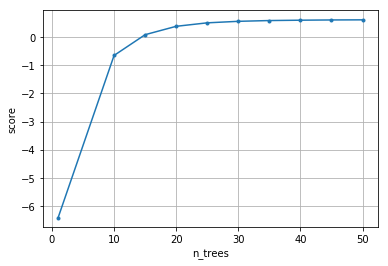

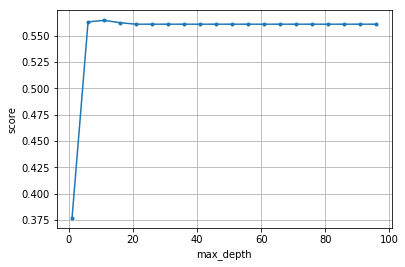

CPU times: user 2.37 s, sys: 2.2 s, total: 4.57 s
Wall time: 6.28 s


In [169]:
%%time
n_trees = [1] + range(10, 55, 5)
max_depths = range(1, 100, 5)
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=n_tree,
                                 min_child_weight=3)
    score = cross_val_score(estimator, X, y, cv = 3, n_jobs=8)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.show()

xgb_scoring = []
for max_depth in max_depths:
    estimator = xgb.XGBRegressor(learning_rate=0.1, max_depth=max_depth, n_estimators=30,
                                 min_child_weight=3)
    score = cross_val_score(estimator, X, y, cv = 3, n_jobs=8)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)
pylab.plot(max_depths, xgb_scoring.mean(axis = 1), marker='.')
pylab.grid(True)
pylab.xlabel('max_depth')
pylab.ylabel('score')
pylab.show()

## ������� 5

�������� ���������� � ������� ������������ �������� �������� � ��������� ������ �������� ���������. 

��� ����� ������� `LinearRegression` �� `sklearn.linear_model` (� ����������� �� ���������) �� ��������� ������� � ������� ��� ��������� ����������� ��������� �� �������� ������� `RMSE`. ���������� �������� - ����� � **������ 5**. 

� ������ ������� �������� ������ ������� ������ ������ ���� ��������� ����, �� �� ����� ��������, ��� ��� ������ �� ������. � �������� � ����� ����� �� ��� ��������� ������ �������� ��������.

In [171]:
lr = LinearRegression()
lr.fit(X_train, y_train)
mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test))**0.5

8.270468034938046